# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 5 ноября 2021

Мягкий дедлайн: 23:59MSK 19 ноября 2021 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 26 ноября 2021.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [2]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

**Замечания**

* Обратите внимание, что ROC/PR-curve строится по предсказанным вероятностям (а не бинаризованым меткам ответов)
* Соответственно ROC/PR-AUC так же считается по предсказанным вероятностям

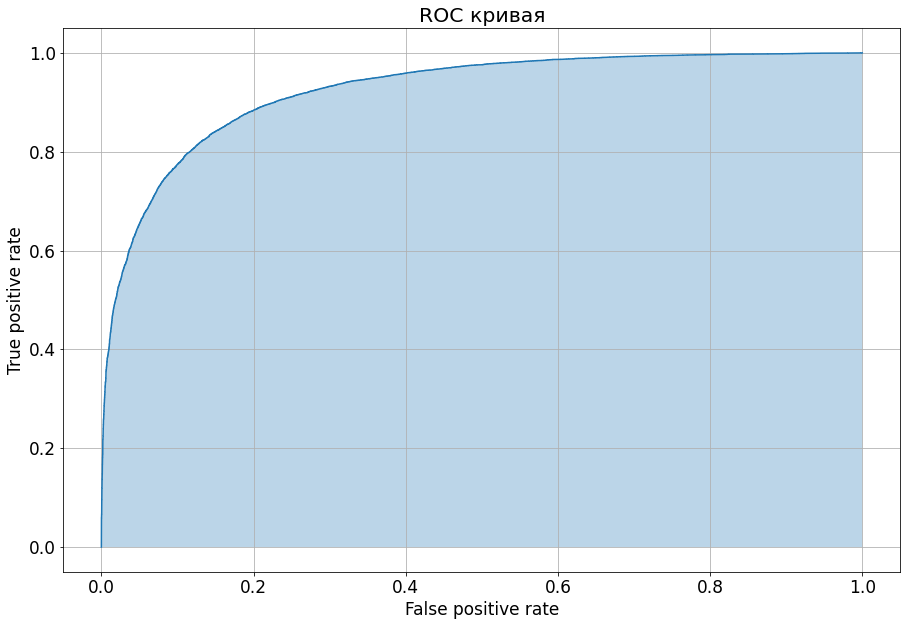

ROC-AUC:0.9240477392219353


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score, average_precision_score
scores = clf.decision_function(X_test)
fpr, tpr, thresholds_roc = roc_curve(y_test, scores)
precision, recall, thresholds_pr = precision_recall_curve(y_test, scores)

plt.figure(figsize=(15,10))
plt.title('ROC кривая')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.rc('font', size=17)
plt.grid(True)
plt.show()

print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

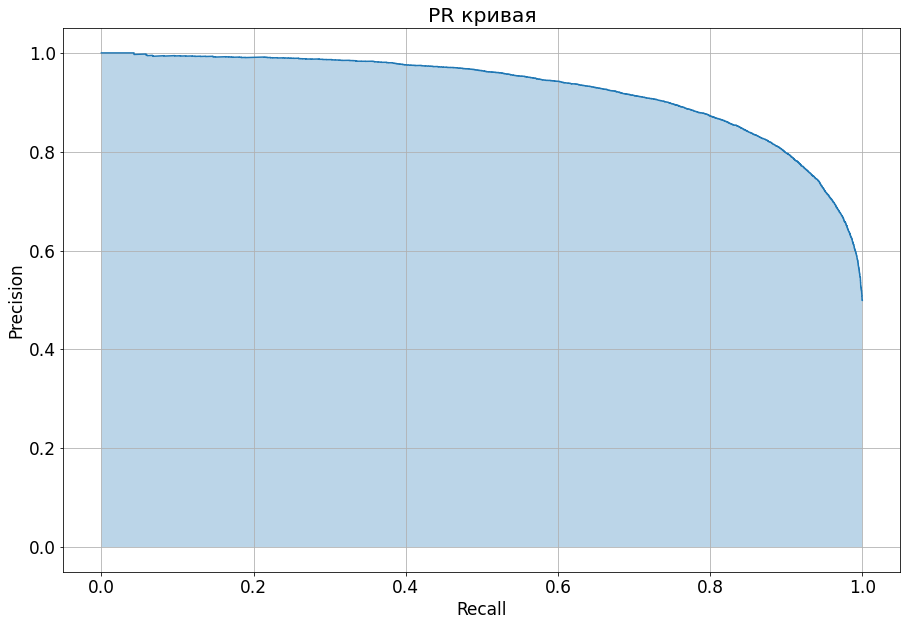

PR-AUC:0.9257766123208175


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(15,10))
plt.title('PR кривая')
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.fill_between(recall, precision, alpha=0.3)
plt.rc('font', size=17)
plt.grid(True)
plt.show()

print(f'PR-AUC:{average_precision_score(y_test, scores)}')

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_v, y_v = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0)

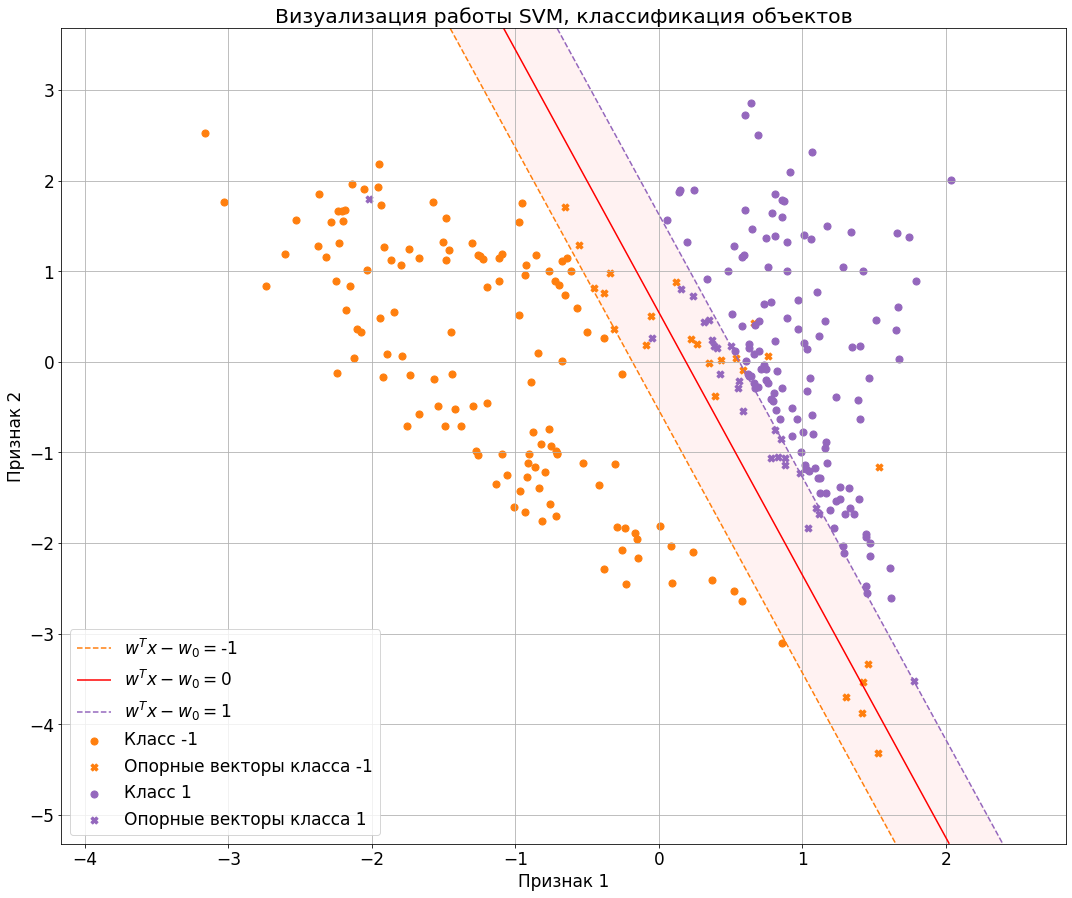

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_v, y_v)
ax1 = X_v[:, 0]
ax2 = X_v[:, 1]
y_v = np.where(y_v == 1, y_v, -1)
classes = np.unique(y_v)

# Идея постоения взята с https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface

xx, yy = np.meshgrid(np.arange(ax1.min()-1, ax1.max()+1), np.arange(ax2.min()-1, ax2.max()+1))
z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(figsize=(18,15))
plt.title('Визуализация работы SVM, классификация объектов')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
bounds = plt.contour(xx, yy, z, colors=['tab:orange', 'r', 'tab:purple'], levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'])
plt.contourf(xx, yy, z, colors='r', levels=[-1, 0, 1], alpha=0.05)

for bound, level in zip(bounds.collections, [-1, 0, 1]):
    bound.set_label(r'$w^{T}x-w_0=$' + str(level))

for clss, color in zip(classes, ['tab:orange', 'tab:purple']):
    idx = np.argwhere(y_v == clss)
    support_idx = np.intersect1d(idx, clf.support_)
    idx = idx[~np.isin(idx, support_idx)]
    plt.scatter(ax1[idx], ax2[idx], c=color, s=50, label=f'Класс {clss}')
    plt.scatter(ax1[support_idx], ax2[support_idx], c=color, marker='X', s=50, label=f'Опорные векторы класса {clss}')

plt.legend()
plt.grid(True)
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. 

* Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [ ]:
def plot_calibration_curve(y_test, preds):
    """
    preds --- array of probabilities
    """
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        # Знак минус нужно заменить на плюс
        bin_middle_points.append((l + r) / 2)
        # min нужно заменить на mean
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def cooler_plot_calibration_curve(y_test, preds1, preds2):
    """
    preds --- array of probabilities
    """
    plt.figure(figsize=(18, 15))
    plt.title('Калибровочные кривые')
    plt.xlabel('Предсказанная вероятность')
    plt.ylabel('Доля единиц среди истинных ответов')
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds1 >= l) & (preds1 < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios, color='r', label='SVM')

    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds2 >= l) & (preds2 < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios, color='tab:orange', label='LogReg') 

    plt.plot([0, 1], linestyle='dashed', alpha=0.5)

    plt.grid(True)
    plt.legend()
    plt.show()   

* **(?)** Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?


**Замечания**
* Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.
* Для нормировки в [0,1] decision_function используйте MinMaxScaler
* Не используйте параметр probability=True при обучении SVM -- этот параметр неявно запускает калибровку предсказания https://scikit-learn.org/stable/modules/svm.html#scores-probabilities

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_c, y_c = make_classification(n_samples=50000, n_features=25, n_informative=15, n_redundant=10)
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.3, shuffle=True)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf1 = LinearSVC()
clf1.fit(X_train_c, y_train_c)
score1 = clf1.decision_function(X_test_c)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
score1 = scaler.fit_transform(score1.reshape((score1.shape[0], 1)))

from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_train_c, y_train_c)
score2 = clf2.predict_proba(X_test_c)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def plot_hist(y_test, score1, score2):
    plt.figure(figsize=(18,15))
    plt.title('Распределение ответов классификаторов')
    plt.xlabel('Предсказанная вероятность')
    plt.ylabel('Количество')
    plt.hist([score1, score2], color=['r', 'tab:orange'], bins=20, label=['SVM', 'LogReg'])
    plt.grid(True)
    plt.legend()
    plt.show()

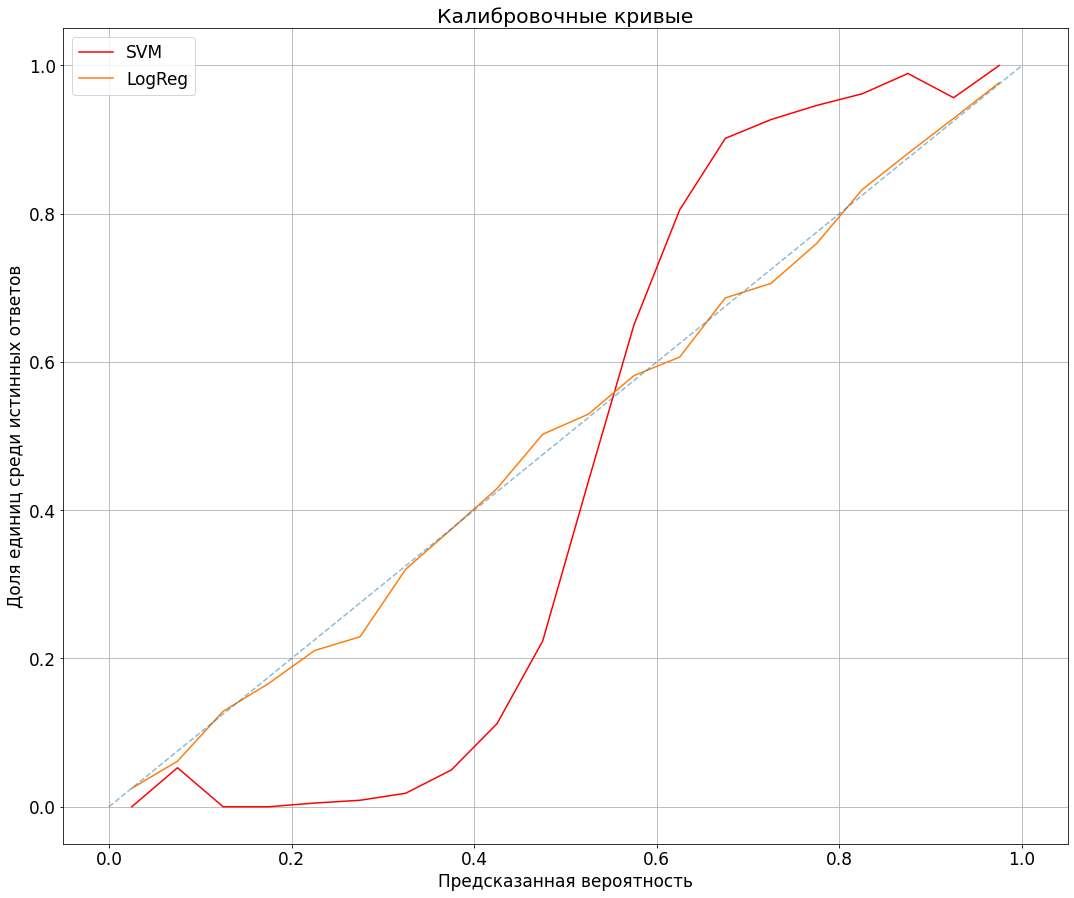

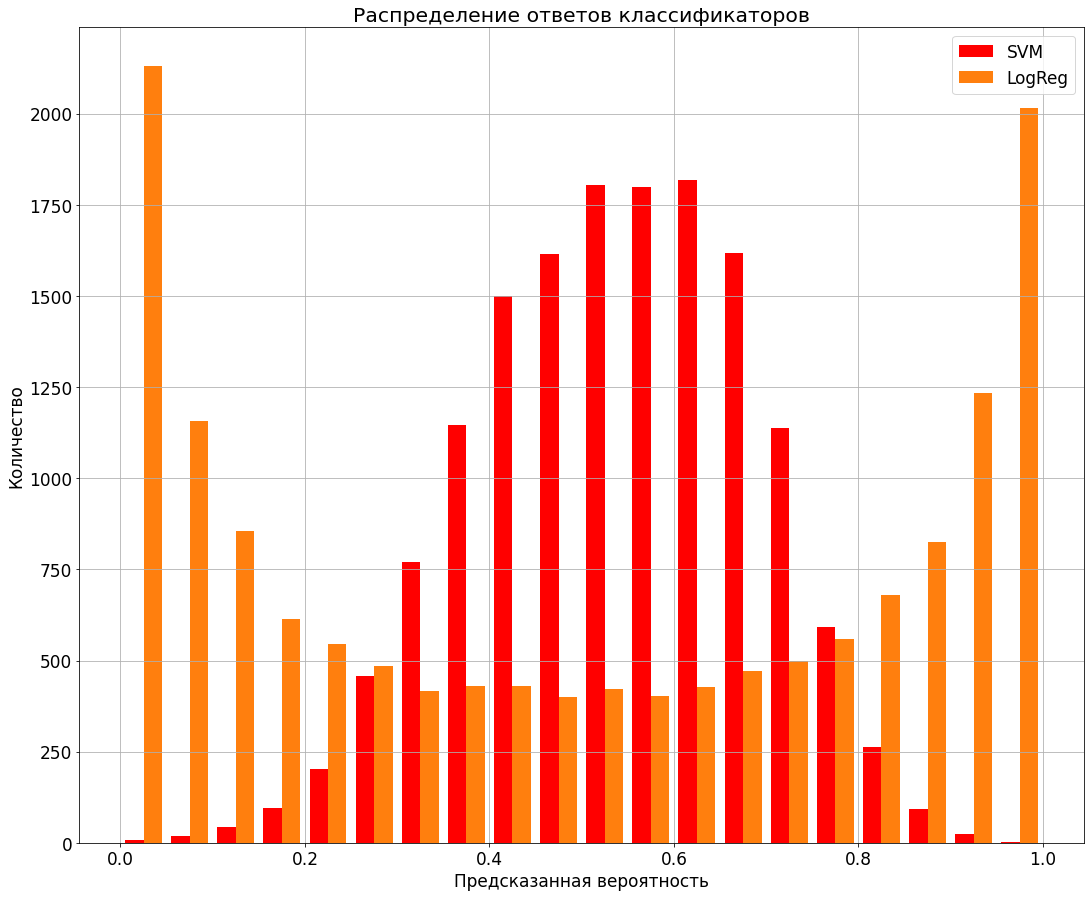

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
score1 = score1.reshape((score1.shape[0],))
cooler_plot_calibration_curve(y_test_c, score1, score2[:, 1])
plot_hist(y_test_c, score1, score2[:, 1])

Калибровочная кривая логистической регрессии ближе к "идеальной" калибровке - прямой $y=x$, чем кривая для SVM. Таким образом, значение ответа для нее примерно равно доле объектов соответствующего класса из соотвтетствующего бина. Для SVM для вероятностей меньше 0.4 доля объектов класса 1 очень близка к 0, далее наблюдается значительное увеличение, и для вероятностей больше 0.7 доля составляет почти 1. Таким образом, малым значениям ответов SVM соответствует очень малая доля объектов класса 1, для больших значений ответов объектов положительного класса большинство, т. е. для малых вероятностей классификация происходит более уверенно, для вероятностей, близких к 1 - менее уверенно.  

По гистограммам распределения ответов видно, что логистическая регрессия чаще выдает вероятности 0 и 1, меньше всего - около 0.5. Зависимость числа ответов от значений ответов похожа на параболу с вершиной в примерно 0.5. Для SVM наибольшее число объектов соответствует вероятностям в районе 0.5. Число ответов возрастает до пика, затем убывает. Большое количество объектов с ответами около 0.5 для SVM может свидетельствовать о наличии значительного числа объектов в районе разделяющей полосы.

Подобное поведение графиков может быть связано с тем, что в методе SVM ищется разделяющая полоса максисмальной ширины, что соответствует меньшей норме вектора весов модели. Алгоритм достаточно уверенно определяет объекты, лежащие вне полосы, а резкий подъем калибровочной кривой для SVM может соответствовать попаданию в разделяющую полосу, где классификация менее уверенная. Логистическая регрессия же выдает вероятности принадлежности объекта к определенному классу более "плавно", и калибровочная кривая ближе к "идеальной". Также отличия могут быть связаны с тем, что в SVM силу максимизации ширины разделяющей полосы могут получаться вектора весов, меньшие по норме, чем в случае логистической регрессии, а также в силу различий минимизируемых функций потерь. 

**(?)** Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


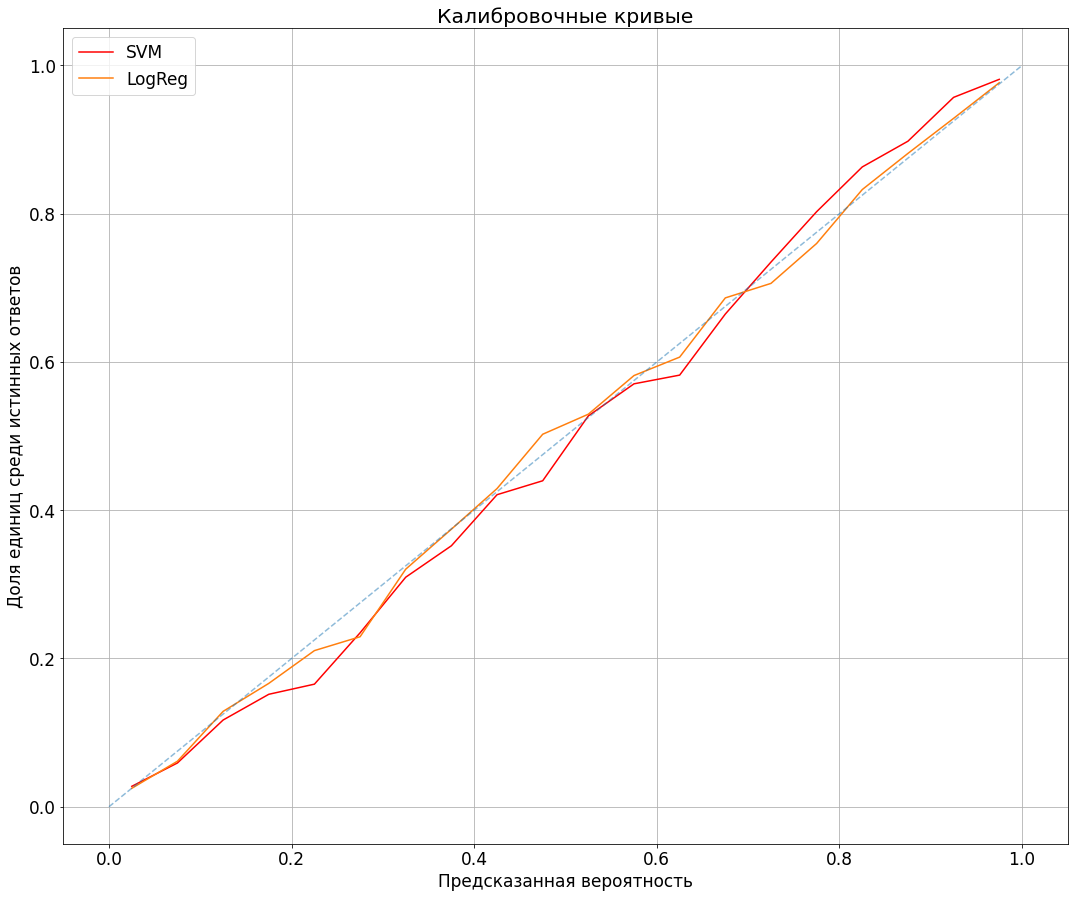

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.calibration import CalibratedClassifierCV
clf = CalibratedClassifierCV(LinearSVC())
clf.fit(X_train_c, y_train_c)
score_calibrated = clf.predict_proba(X_test_c)
cooler_plot_calibration_curve(y_test_c, score_calibrated[:, 1], score2[:, 1]) 

Калибровочная кривая значительно улучшилась, стала ближе к "идеальной", алгоритм стал лучше классифицировать объекты с большими и малыми значениями ответов.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

Рассмотрим один из наиболее простых способов калибровки - гистограммную калибровку (histogram binning). В нем значения ответов алгоритма $a(x_i)$ для объектов $x_{i}$ разбиваются на отрезки (бины), и если оценка принадлежности объекта к классу попала в бин $j$, то она заменяется на значение $\theta_{j}$, и решается задача:

$$ \sum_{j=1}^{m} \sum_{i=1}^{l} [a(x_{i}) \in B_{j}](\theta_{j} - y_{i})^2 \rightarrow \min_{\theta_{1}...\theta_{m}} $$

где $\{B_{1},...,B_{m}\}=\{[0,\alpha_{1}), [\alpha_{1}, \alpha_{2}),...,[\alpha_{m-1}, 1]\}$ - бины значений ответов. Тогда $\theta_{j}$ могут быть найдены как выборочные средние ответов для объектов класса 1, ответы для которых попали в бин $B_{j}$. Отрезки разбиения можно брать и не равные по длине в общем случае.

В методе требуется задавать число бинов изначально, и функция "деформации" исходных ответов алгоритма не является непрерывной. Также требуется нормализовать ответы алгоритма. При этом данный метод - непараметрический.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
class HistogramBinning:
    def __init__(self, n_bins):
        self.n_bins = n_bins
        self.bins = np.linspace(0, 1, n_bins + 1)

    def fit(self, y_test, preds):
        preds = (preds - preds.min()) / (preds.max() - preds.min())
        res = []
        length = len(self.bins)
        for i in range(length - 1):
            res.append(y_test[(self.bins[i] <= preds) & (preds < self.bins[i + 1])].mean())
        res.append(res[length - 2])
        self.res = np.array(res)

    def transform(self, preds):
        preds = (preds - preds.min()) / (preds.max() - preds.min())
        idx = np.digitize(preds, self.bins) - 1
        return self.res[idx]

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LinearSVC()
clf.fit(X_train_c, y_train_c)
hist_binner = HistogramBinning(n_bins=100)
hist_binner.fit(y_train_c, clf.decision_function(X_train_c))
scores = clf.decision_function(X_test_c)
scores_binned = hist_binner.transform(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


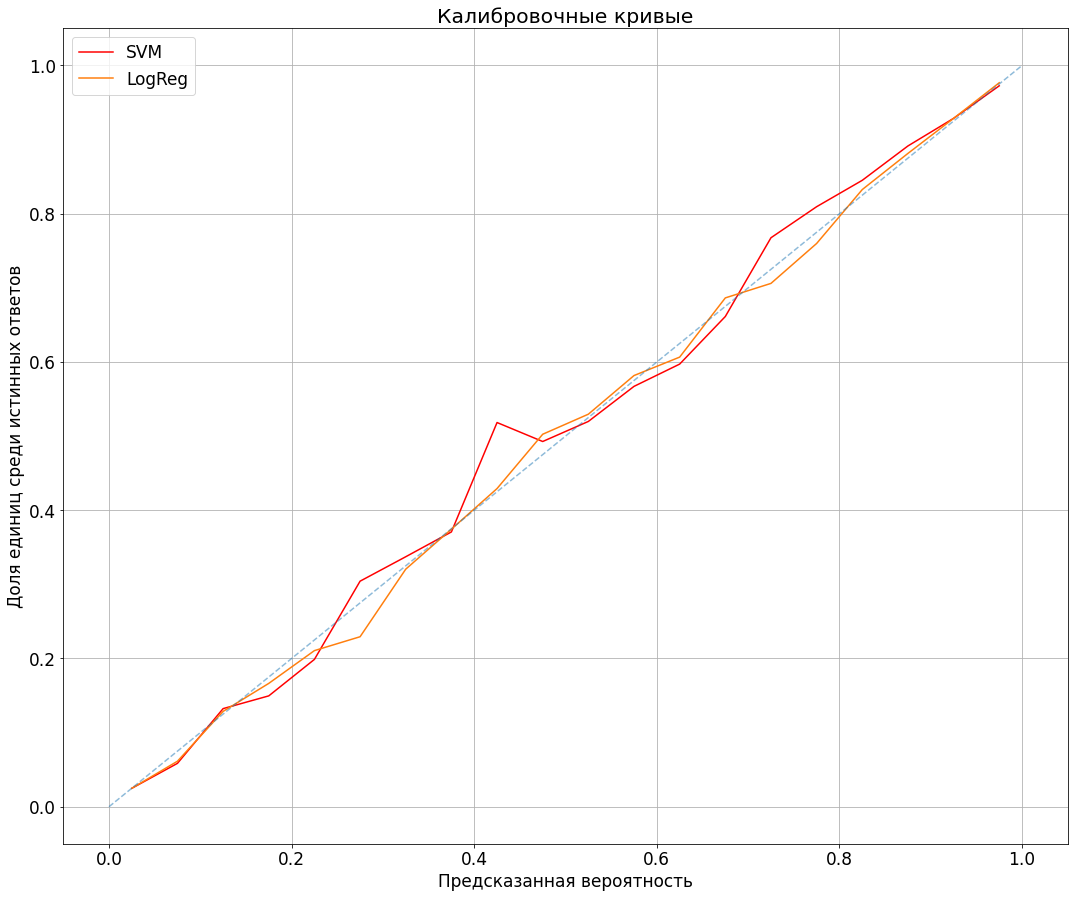

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
cooler_plot_calibration_curve(y_test_c, scores_binned, score2[:, 1])

Таким образом, данная калибровка дает хороший результат, близкий к логистической регрессии и идельной кривой.

## Часть 2. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(1 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train.csv


In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [ ]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', max_iter=2000, solver='sag', random_state=0)
clf.fit(X_train, y_train)
scores = clf.predict_proba(X_test)

**(?)** Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

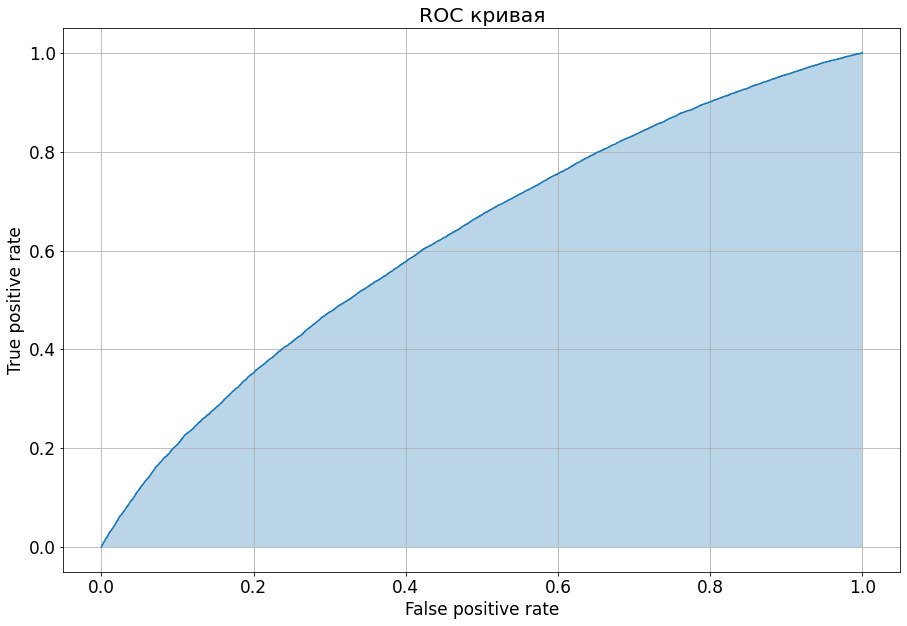

ROC-AUC:0.6250581374008373


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
scores = scores[:, 1]
from sklearn.metrics import roc_curve, precision_recall_curve, auc
fpr, tpr, thresholds_roc = roc_curve(y_test, scores)
precision, recall, thresholds_pr = precision_recall_curve(y_test, scores)

plt.figure(figsize=(15,10))
plt.title('ROC кривая')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.rc('font', size=17)
plt.grid(True)
plt.show()

print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

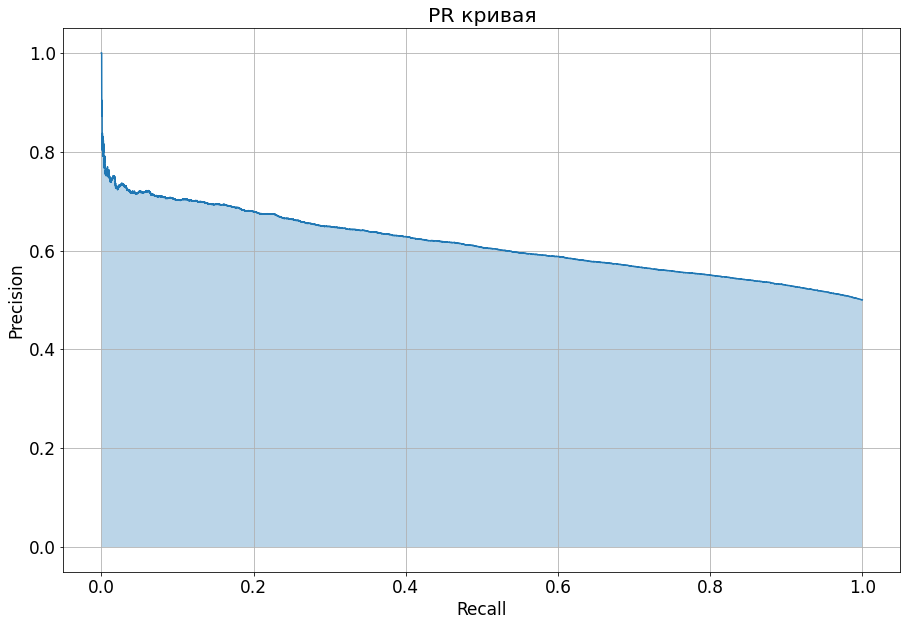

PR-AUC:0.6128840911172063


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(15,10))
plt.title('PR кривая')
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.fill_between(recall, precision, alpha=0.3)
plt.rc('font', size=17)
plt.grid(True)
plt.show()

print(f'PR-AUC:{average_precision_score(y_test, scores)}')

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**
ROC-кривая близка к диагонали, соответствующей случайному угадыванию, что свидетельствует о неудовлетворительной работе модели. Также PR-кривая находится очень далеко от точки с координатами (1, 1), соответствующей идеальной классификации. Таким образом, качество классификации данной модели не высоко.

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1.5 балла)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

Рассмотрим l2 регуляризацию. Для отслеживания динамики изменения функции потерь будем брать ее значение раз в 50 итераций алгоритма, суммарно рассмотрим по 2000 итераций.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import log_loss
alphas = np.logspace(-5, 2, 8)
losses = []
iterations = 40
for alpha in alphas:
    clf = LogisticRegression(penalty='l2', C=1.0/alpha, solver='sag', random_state=0, max_iter=50, warm_start=True)
    alpha_loss = []
    for iter in range(iterations):
        clf.fit(X_train, y_train)
        alpha_loss.append(log_loss(y_train, clf.predict_proba(X_train)))
    losses.append(alpha_loss)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [ ]:
# Без регуляризации
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=50, warm_start=True)
no_reg_loss = []
for iter in range(iterations):
    clf.fit(X_train, y_train)
    no_reg_loss.append(log_loss(y_train, clf.predict_proba(X_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

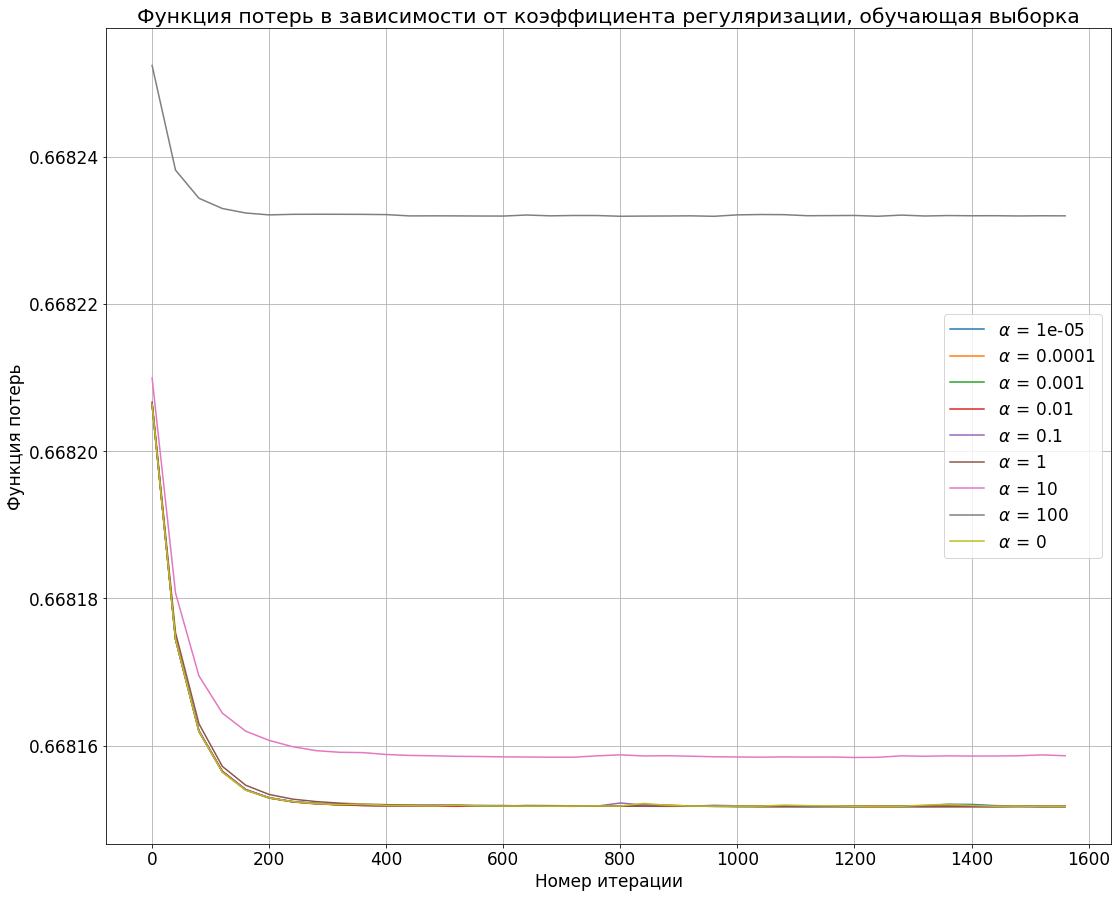

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(18,15))
plt.title('Функция потерь в зависимости от коэффициента регуляризации, обучающая выборка')
plt.xlabel('Номер итерации')
plt.ylabel('Функция потерь')
length = len(losses)
for i in range(length):
    plt.plot(np.arange(len(losses[i])) * iterations, losses[i], label=f'$\\alpha\,=\,${alphas[i]:g}')
plt.plot(np.arange(len(no_reg_loss)) * iterations, no_reg_loss, label=f'$\\alpha\,=\,${0}')
plt.rc('font', size=17)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import log_loss
alphas = np.logspace(-5, 2, 8)
losses = []
iterations = 40
for alpha in alphas:
    clf = LogisticRegression(penalty='l2', C=1.0/alpha, solver='sag', random_state=0, max_iter=50, warm_start=True)
    alpha_loss = []
    for iter in range(iterations):
        clf.fit(X_train, y_train)
        alpha_loss.append(log_loss(y_test, clf.predict_proba(X_test)))
    losses.append(alpha_loss)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [ ]:
# Без регуляризации
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=50, warm_start=True)
no_reg_loss = []
for iter in range(iterations):
    clf.fit(X_train, y_train)
    no_reg_loss.append(log_loss(y_test, clf.predict_proba(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

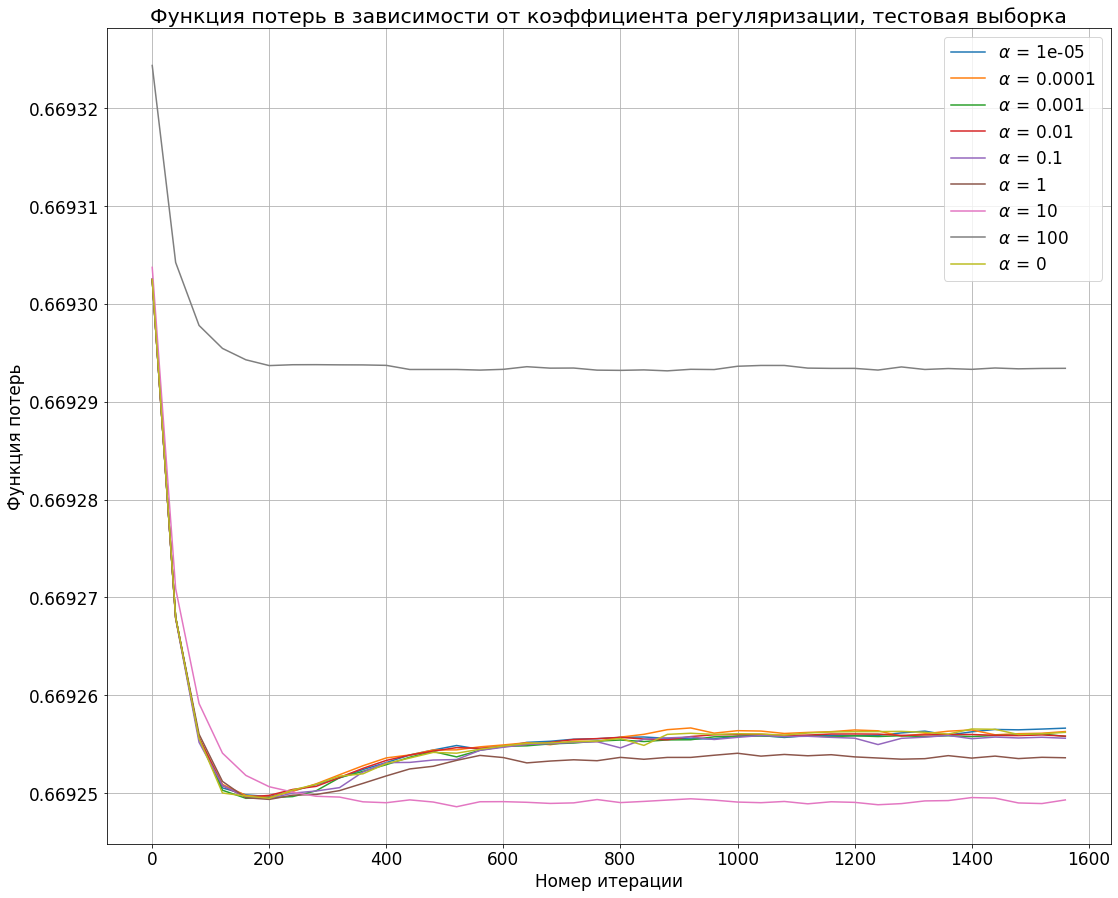

In [ ]:
plt.figure(figsize=(18,15))
plt.title('Функция потерь в зависимости от коэффициента регуляризации, тестовая выборка')
plt.xlabel('Номер итерации')
plt.ylabel('Функция потерь')
length = len(losses)
for i in range(length):
    plt.plot(np.arange(len(losses[i])) * iterations, losses[i], label=f'$\\alpha\,=\,${alphas[i]:g}')
plt.plot(np.arange(len(no_reg_loss)) * iterations, no_reg_loss, label=f'$\\alpha\,=\,${0}')
plt.rc('font', size=17)
plt.legend()
plt.grid(True)
plt.show()


Таким образом, на обучающей выборке с ростом коэффициента регуляризации значение функции потерь возрастает, при малых значениях $\alpha$ графики очень близки друг к другу. На тестовой выборке для $\alpha$ от 0 до 1 явной монотонной зависимости функции потерь от $\alpha$ не наблюдается, графики расположены близко друг к другу. На обучающей выборке значение функции ошибки уменьшается с ростом числа итераций алгоритма. На тестовой выборке потери больше, функция потерь убывает до примерно 200 итераций, далее плавно растет, приближаясь к асимптоте. На обучении в целом при использовании регуляризации значение функции ошибки больше, чем без нее, алгоритм без регуляризации дает наилучшие значения функции ошибок. На тесте наилучшие значения достигаются для $\alpha=10$, в этом случае функция потерь всегда убывает.

## Часть 3. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train, y_train)
scores = clf.predict_proba(X_test)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 735 epochs took 75 seconds
ROC-AUC:0.6250581374008373


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
idx = np.array([i for i in range(len(data.columns)) if 'cat' in data.columns[i]])
cols = [col for col in X_train.columns if col not in X_train.columns[idx]]
X_train_cat = X_train.iloc[:, idx]
X_test_cat = X_test.iloc[:, idx]
X_train_noncat = X_train[cols]
X_test_noncat = X_test[cols]
X_train_cat_OHE = np.zeros((X_train_cat.shape[0], 0))
X_test_cat_OHE = np.zeros((X_test_cat.shape[0], 0))
from sklearn.preprocessing import OneHotEncoder
for i in range(X_train_cat.shape[1]):
    OHE = OneHotEncoder(sparse=False, categories='auto')
    new_train_feat = OHE.fit_transform(X_train_cat.values[:, i][:, None])
    new_test_feat = OHE.transform(X_test_cat.values[:, i][:, None])
    X_train_cat_OHE = np.concatenate((X_train_cat_OHE, new_train_feat), axis=1)
    X_test_cat_OHE = np.concatenate((X_test_cat_OHE, new_test_feat), axis=1)

X_train_OHE = np.concatenate((X_train_noncat, X_train_cat_OHE), axis=1)
X_test_OHE = np.concatenate((X_test_noncat, X_test_cat_OHE), axis=1)


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(X_train.shape)

(100000, 57)


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(X_train_OHE.shape)

(100000, 226)


Таким образом, one-hot кодирование значительно увеличило число признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train_OHE, y_train)
scores = clf.predict_proba(X_test_OHE)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 280 seconds
ROC-AUC:0.6328458291129799


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.7min finished


Число признаков и время обучения значительно возросли, при этом качество классификации улучшилось незначительно

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

**Замечание (!)**
* При реализации счетчиков необходимо использовать один из методов борьбы с переобучением. В заданиях вам либо говорится, как использовать, либо вы выбираете сами

**(Бонусная часть)** Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 баллa)__

Рассмотрим без добавления шума

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_cc = X_train.copy(deep=True)
X_test_cc = X_test.copy(deep=True)
for i in range(X_train.shape[1]):
    if i not in idx:
        continue
    
    for val in np.unique(X_train.iloc[:, i]):
        val_train = y_train[X_train.iloc[:, i] == val].mean()
        X_train_cc.iloc[:, i][X_train_cc.iloc[:, i] == val] = val_train

    for val in np.unique(X_test.iloc[:, i]):
        val_test = y_test[X_test.iloc[:, i] == val].mean()
        X_test_cc.iloc[:, i][X_test_cc.iloc[:, i] == val] = val_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train_cc, y_train)
scores = clf.predict_proba(X_test_cc)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 71 seconds
ROC-AUC:0.630860485884391


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished


Качество немного улучшилось. Добавим шум, рассмотрим различные значения $\sigma$

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
stds = np.logspace(-4, 0, 5)

clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000)

for std in stds:
    X_train_noise = X_train_cc.copy(deep=True)
    X_test_noise = X_test_cc.copy(deep=True)
    for i in range(X_train_cc.shape[1]):
        if i not in idx:
            continue
        X_train_noise.iloc[:, i] = X_train_noise.iloc[:, i] + std
        X_test_noise.iloc[:, i] = X_test_noise.iloc[:, i] + std
    clf.fit(X_train_noise, y_train)
    scores = clf.predict_proba(X_test_noise)[:, 1]
    print(std)
    print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')
    print()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.0001
ROC-AUC:0.6308604718843908



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.001
ROC-AUC:0.6308604922843911



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.01
ROC-AUC:0.6308595930843781



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.1
ROC-AUC:0.6308532638842871

1.0
ROC-AUC:0.6307104118822299



**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**
При данном подходе время работы алгоритма значительно лучше, чем при one-hot кодировании, и есть небольшое улучшение качества классификации в сравнении с исходными данными, но меньшее, чем при one-hot кодировании. Однако one-hot encoding требует больше затрат памяти и времени. Стоит отметить, что в целом добавление шума приводит к несущественному снижению качества по сравнению с его отстутствием (только при значении 0.001 есть совсем незначительное улучшение), и с ростом $\sigma$ оно сильнее, шум сильнее сказывается на счетчиках. 

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

Будем считать, что id объектов в выборке соответствует их "порядку". Брать упорядочение по индексам массива в выборке может быть ошибочно, так как объекты могут быть изначально неупорядочены относительно рассматриваемого "порядка", и тогда он будет зависеть от разбиения на обучение и тест, и будет существовать зависимость между обучающими и тестовыми данными.

Будем считать счетчики для объектов по "предшествующим" им. Сначала рассмотрим без добавления шума.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_s = X_train.copy(deep=True)
X_test_s = X_test.copy(deep=True)
X_train_s['y'] = y_train
X_test_s['y'] = y_test
X_train_s = X_train_s.sort_values('id')
X_test_s = X_test_s.sort_values('id')
y_train_s = X_train_s.pop('y')
y_test_s = X_test_s.pop('y')

for i in range(X_train_s.shape[1]):
    if i not in idx:
        continue
    
    vals = np.unique(X_train_s.iloc[:, i])
    for val in vals:
        sum = y_train_s[X_train_s.iloc[:, i] == val].cumsum()
        num = np.arange(1, (X_train_s.iloc[:, i] == val).sum() + 1)
        part = sum / num
        X_train_s.iloc[:, i][X_train_s.iloc[:, i] == val] = part
        
    vals = np.unique(X_test_s.iloc[:, i])
    for val in vals:
        sum = y_test_s[X_test_s.iloc[:, i] == val].cumsum()
        num = np.arange(1, (X_test_s.iloc[:, i] == val).sum() + 1)
        part = sum / num
        X_test_s.iloc[:, i][X_test_s.iloc[:, i] == val] = part

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:6

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train_s, y_train_s)
scores = clf.predict_proba(X_test_s)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test_s, scores)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 373 epochs took 42 seconds
ROC-AUC:0.6374325791790292


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.9s finished


Качество улучшилось, и результат лучше, чем при one-hot encoding

Рассмотрим с добавлением шума, возьмем значение $\sigma=0.001$ как наилучшее по результатам предыдущих экспериментов

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_s = X_train.copy(deep=True)
X_test_s = X_test.copy(deep=True)
X_train_s['y'] = y_train
X_test_s['y'] = y_test
X_train_s = X_train_s.sort_values('id')
X_test_s = X_test_s.sort_values('id')
y_train_s = X_train_s.pop('y')
y_test_s = X_test_s.pop('y')

for i in range(X_train_s.shape[1]):
    if i not in idx:
        continue
    
    vals = np.unique(X_train_s.iloc[:, i])
    for val in vals:
        std = 0.001
        sum = y_train_s[X_train_s.iloc[:, i] == val].cumsum()
        num = np.arange(1, (X_train_s.iloc[:, i] == val).sum() + 1)
        part = sum / num
        X_train_s.iloc[:, i][X_train_s.iloc[:, i] == val] = part + std
        
    vals = np.unique(X_test_s.iloc[:, i])
    for val in vals:
        std = 0.001
        sum = y_test_s[X_test_s.iloc[:, i] == val].cumsum()
        num = np.arange(1, (X_test_s.iloc[:, i] == val).sum() + 1)
        part = sum / num
        X_test_s.iloc[:, i][X_test_s.iloc[:, i] == val] = part + std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:6

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train_s, y_train_s)
scores = clf.predict_proba(X_test_s)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test_s, scores)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 374 epochs took 42 seconds
ROC-AUC:0.6374757995796516


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.5s finished


В итоге получили небольшой прирост качества, среди рассмотренных реализаций счетчиков этот результат наилучший.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(1 балл)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_cc = X_train.copy(deep=True)
X_test_cc = X_test.copy(deep=True)
global_mean_train = y_train.mean()
global_mean_test = y_test.mean()
C = 10

for i in range(X_train.shape[1]):
    if i not in idx:
        continue
    
    for val in np.unique(X_train.iloc[:, i]):
        val_train = y_train[X_train.iloc[:, i] == val].sum() + C * global_mean_train
        val_train /= (y_train[X_train.iloc[:, i] == val].shape[0] + C)
        X_train_cc.iloc[:, i][X_train_cc.iloc[:, i] == val] = val_train

    for val in np.unique(X_test.iloc[:, i]):
        val_test = y_test[X_test.iloc[:, i] == val].sum() + C * global_mean_test
        val_test /= (y_test[X_test.iloc[:, i] == val].shape[0] + C)
        X_test_cc.iloc[:, i][X_test_cc.iloc[:, i] == val] = val_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dis

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train_cc, y_train)
scores = clf.predict_proba(X_test_cc)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 112 seconds
ROC-AUC:0.63088818788479


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min finished


В итоге получили улучшение качества классификации в сравнении с исходными данными, но меньшее, чем для one-hot кодирования и некоторых счетчиков без сглаживания. 

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты.

**(?)** Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**
Использование счетчиков позволяет снизить затраты памяти и времени по сравнению с one-hot кодированием. Также можно применять множество различных приемов на подобии сглаживания и добавления шума, можно тщательнее настраивать метод. Однако самые простые реализации счетиков дают качество хуже, чем для one-hot кодирования, следовательно, требуется более продуманная реализация и более аккуратный подбор приемов и настройка параметров.

## Часть 4. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
idx = np.array([i for i in range(len(data.columns)) if 'cat' in data.columns[i]])
cols = [col for col in X_train.columns if col not in X_train.columns[idx]]
X_train_cat = X_train.iloc[:, idx]
X_test_cat = X_test.iloc[:, idx]
X_train_noncat = X_train[cols]
X_test_noncat = X_test[cols]
X_train_cat_OHE = np.zeros((X_train_cat.shape[0], 0))
X_test_cat_OHE = np.zeros((X_test_cat.shape[0], 0))
from sklearn.preprocessing import OneHotEncoder
for i in range(X_train_cat.shape[1]):
    OHE = OneHotEncoder(sparse=False, categories='auto')
    new_train_feat = OHE.fit_transform(X_train_cat.values[:, i][:, None])
    new_test_feat = OHE.transform(X_test_cat.values[:, i][:, None])
    X_train_cat_OHE = np.concatenate((X_train_cat_OHE, new_train_feat), axis=1)
    X_test_cat_OHE = np.concatenate((X_test_cat_OHE, new_test_feat), axis=1)

X_train_OHE = np.concatenate((X_train_noncat, X_train_cat_OHE), axis=1)
X_test_OHE = np.concatenate((X_test_noncat, X_test_cat_OHE), axis=1)

print(X_train_OHE.shape[1])

227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000)
clf.fit(X_train_OHE, y_train)
scores = clf.predict_proba(X_test_OHE)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

ROC-AUC:0.6380744559599296


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

**(?)** Изменилось ли качество? Как?

__(0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
idx = np.argsort(np.abs(clf.coef_)).ravel()[-200:]
X_train_w = X_train_OHE[:, idx]
X_test_w = X_test_OHE[:, idx]

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train_w, y_train)
scores = clf.predict_proba(X_test_w)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1370 seconds
ROC-AUC:0.6383023737799718


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.8min finished


Наблюдается небольшое улучшение качества модели.

**(?)** А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

Применим два самых распространенных способа нормализации данных - стандартизацию и min-max scaling

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()
X_train_normalized = std_scaler.fit_transform(X_train_OHE)
X_test_normalized = std_scaler.transform(X_test_OHE)
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000)
clf.fit(X_train_normalized, y_train)
scores = clf.predict_proba(X_test_normalized)[:, 1]
print(f'Standartization ROC-AUC:{roc_auc_score(y_test, scores)}')
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train_OHE)
X_test_min_max = min_max_scaler.transform(X_test_OHE)
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000)
clf.fit(X_train_min_max, y_train)
scores = clf.predict_proba(X_test_min_max)[:, 1]
print(f'Min-max ROC-AUC:{roc_auc_score(y_test, scores)}')

Standartization ROC-AUC:0.6380806571192187


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Min-max ROC-AUC:0.6380822951612951


На всех признаках видно небольшое улучшение качества, min-max scaling дает результат немного лучше. Теперь отберем признаки


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()
X_train_normalized = std_scaler.fit_transform(X_train_OHE)
X_test_normalized = std_scaler.transform(X_test_OHE)
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000)
clf.fit(X_train_normalized, y_train)

idx = np.argsort(np.abs(clf.coef_)).ravel()[-200:]
X_train_w = X_train_normalized[:, idx]
X_test_w = X_test_normalized[:, idx]

clf.fit(X_train_w, y_train)

scores = clf.predict_proba(X_test_w)[:, 1]
print(f'Standartization ROC-AUC:{roc_auc_score(y_test, scores)}')

min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train_OHE)
X_test_min_max = min_max_scaler.transform(X_test_OHE)
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000)
clf.fit(X_train_min_max, y_train)

idx = np.argsort(np.abs(clf.coef_)).ravel()[-200:]
X_train_w = X_train_min_max[:, idx]
X_test_w = X_test_min_max[:, idx]

clf.fit(X_train_w, y_train)

scores = clf.predict_proba(X_test_w)[:, 1]
print(f'Min-max ROC-AUC:{roc_auc_score(y_test, scores)}')

Standartization ROC-AUC:0.6380468835965059


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Min-max ROC-AUC:0.638227840848203


После отбора признаков результат для стандартизации незначительно ухудшился, для min-max scaling - улучшился, качество для этого метода так же лучше, чем для стандартизации и для исходных данных после one-hot encoding, но хуже, чем для отбора признаков для исходных данных после one-hot encoding. 

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случае.

__(0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def t_stat(pos_class, neg_class):
    denominator = (pos_class.shape[0] * np.var(pos_class, axis=0) + neg_class.shape[0] * np.var(neg_class, axis=0)) / (pos_class.shape[0] + neg_class.shape[0])
    return np.abs(np.mean(pos_class, axis=0) - np.mean(neg_class, axis=0)) / np.sqrt(denominator)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import time
start = time.time()
pos_idx = np.argwhere(y_train == 1)
neg_idx = np.argwhere(y_train == 0)
t_stats = t_stat(X_train_OHE[pos_idx.reshape(pos_idx.shape[0],)], X_train_OHE[neg_idx.reshape(neg_idx.shape[0],)])
idx = np.argsort(t_stats)[-200:]
end = time.time() - start
print(f't-statistics computation time: {end}')

t-statistics computation time: 0.9254534244537354


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_t = X_train_OHE[:, idx]
X_test_t = X_test_OHE[:, idx]
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train_t, y_train)
scores = clf.predict_proba(X_test_t)[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1306 seconds
ROC-AUC:0.6386112213685123


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.8min finished


С отбором по t-статистике получаем наилучшее качество среди рассмотренных методов отбора признаков.

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлемо. 

**Напишите функцию, которая отбирает признаки вышеприведенным способом (использовать готовые решения аналогичных библиотечных функций нельзя)**

**Замечание**
* Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_OHE.shape

(476169, 227)

In [ ]:
from tqdm.notebook import trange

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def feature_selection(X_train, X_val, y_train, y_val, limit):
    features = X_train.columns.tolist()
    delete_features = []
    for iter in trange(limit):
        res = []
        for feature in features:
            clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=100)
            X_train_temp = X_train.drop(delete_features+[feature], axis=1)
            X_val_temp = X_val.drop(delete_features+[feature], axis=1)
            clf.fit(X_train_temp, y_train)
            res.append(roc_auc_score(y_val, clf.predict_proba(X_val_temp)[:, 1]))
        idx = np.argmax(res)
        delete_features.append(features.pop(idx))
    return features

Будем рассматривать сэмплы по 10000 объектов для обучения и валидации, оставляем 200 признаков

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_fs = pd.DataFrame(data=X_train_OHE, index=range(X_train_OHE.shape[0]), columns=range(X_train_OHE.shape[1]))
X_test_fs = pd.DataFrame(data=X_test_OHE, index=range(X_test_OHE.shape[0]), columns=range(X_test_OHE.shape[1]))
sample_idx = np.random.permutation(X_train_OHE.shape[0])[:20000]
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_train_fs.iloc[sample_idx], y_train[sample_idx], test_size=0.5)

remaining_features = feature_selection(X_train_f, X_val_f, y_train_f, y_val_f, limit=27)
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000)
clf.fit(X_train_fs[remaining_features], y_train)
scores = clf.predict_proba(X_test_fs[remaining_features])[:, 1]
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

  0%|          | 0/27 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_

ROC-AUC:0.6361398919564392


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Полученное значение ROC-AUC:0.6361398919564392

Жадное удаление признаков дало результат несколько хуже, чем для исходных данных

**(?)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ** 
Наихудший результат показал жадный отбор признаков, при котором исключаем по 1 признаку, без которого достигается наилучшее значение ROC-AUC, и далее так же перебираются оставшиеся признаки. Это могло произойти в силу жадности алгоритма, в силу наличия более сложной зависимости между признаками, или же в силу взятия случайных индексов объектов для составления сэмплов. Возможно в иных случаях или при большей выборке и числе итераций и т. д. этот способ даст результаты лучше. Данный метод требует больших затрат времени, памяти и вычислений даже на сокращенном датасете, однако идейно прост и понятен. 

Качество немного лучше, чем на исходных данных, дал отбор признаков по наибольшим модулям коэффициентов вектора весов. Метод прост и не требует больших затрат времени и памяти, однако не учитывает масштаб признаков и предполагает линейную зависимость между признаками и ответами. 

Стандартизация и min-max scaling для исходных данных показали результат незначительно лучше, чем без преобразований, после отбора признаков по модулям весов, аналогичного предыдущему описанному методу, для стандартизации результат стал немного хуже, чем на исходных данных, но для min-max scaling качество возросло. Таким образом, для отбора признаков по модулям коэффициентов вектора весов масштабирование признаков позволяет добиться лучшего качества. Возможно иные способы масштабирования дадут результат лучше.

Наилучший среди методов результат показывает использование t-статистики. Он прост в реализации и тщательнее учитывает статистические характеристики каждого признака, позволяет производить более детальный отбор. 

## Часть 5. Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

**Задание 11 (0.5 балла)**

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

**(?)** Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(target.mean())

0.036447517859182946


Положительных объектов в выборе очень мало, это может быть связано с тем, что страховые случаи (ДТП, катаклизмы, происшествия и т. д.) происходят относительно редко.  

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
idx = np.array([i for i in range(len(data.columns)) if 'cat' in data.columns[i]])
cols = [col for col in X_train.columns if col not in X_train.columns[idx]]
X_train_cat = X_train.iloc[:, idx]
X_test_cat = X_test.iloc[:, idx]
X_train_noncat = X_train[cols]
X_test_noncat = X_test[cols]
X_train_cat_OHE = np.zeros((X_train_cat.shape[0], 0))
X_test_cat_OHE = np.zeros((X_test_cat.shape[0], 0))
from sklearn.preprocessing import OneHotEncoder
for i in range(X_train_cat.shape[1]):
    OHE = OneHotEncoder(sparse=False, categories='auto')
    new_train_feat = OHE.fit_transform(X_train_cat.values[:, i][:, None])
    new_test_feat = OHE.transform(X_test_cat.values[:, i][:, None])
    X_train_cat_OHE = np.concatenate((X_train_cat_OHE, new_train_feat), axis=1)
    X_test_cat_OHE = np.concatenate((X_test_cat_OHE, new_test_feat), axis=1)

X_train_OHE = np.concatenate((X_train_noncat, X_train_cat_OHE), axis=1)
X_test_OHE = np.concatenate((X_test_noncat, X_test_cat_OHE), axis=1)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf = LogisticRegression(penalty='none', solver='sag', random_state=0, max_iter=1000, verbose=1)
clf.fit(X_train_OHE, y_train)
scores = clf.predict_proba(X_test_OHE)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1320 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.0min finished


**(?)** Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(f'ROC-AUC:{roc_auc_score(y_test, scores)}')

ROC-AUC:0.6380744559599296


Значение ROC-AUC близко к 0.5, т. е. к случайному угадыванию, что нельзя назвать хорошим результатом. Это может быть связано с дисбалансом классов, объектов положительного класса заметно меньше, или же с наличием сложных нелинейных зависимостей в данных.

**(?)** Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

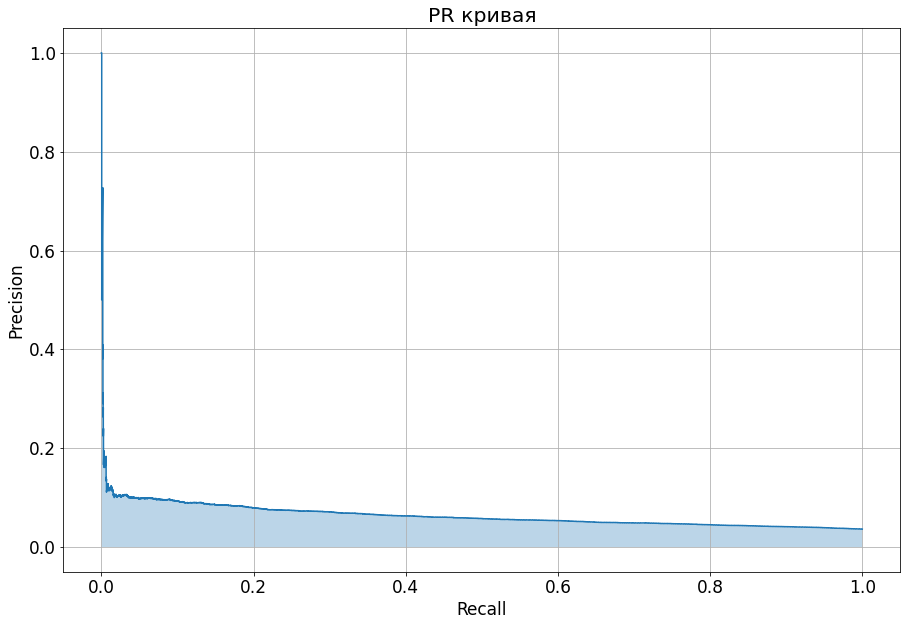

PR-AUC:0.06416890184698978


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import roc_curve, precision_recall_curve, auc
precision, recall, thresholds_pr = precision_recall_curve(y_test, scores)
plt.figure(figsize=(15,10))
plt.title('PR кривая')
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.fill_between(recall, precision, alpha=0.3)
plt.rc('font', size=17)
plt.grid(True)
plt.show()

from sklearn.metrics import average_precision_score
print(f'PR-AUC:{average_precision_score(y_test, scores)}')

По графику можно судить о низкой точности модели, она сильно убывает с ростом полноты, не удастся добиться приемлемых значений полноты и точности одновременно, кривая расположена далеко от точки (1,1). Причиной этому может быть то, что в выборке большинство объектов из отрицательного класса, и много объектов оказываются в false positive.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 12.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем (т.е доля тех клиентов (среди всех клиентов тестовой выборки), которых мы пометили единичками, но у которых на самом деле был 0 в y_test)?

**Замечание-подсказка (!)**
* Порог нужно искать по precision

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
idx = np.argwhere(precision >= 0.95)
idx

array([[118893],
       [118894],
       [118895]])

Найдем минимальный удовлетворяющий порог

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
thresholds_pr[idx[0]]

array([0.48660426])

Оценим precision  recall для данного порога

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(f'Precision: {precision[idx[0]]}')
print(f'Recall: {recall[idx[0]]}')

Precision: [1.]
Recall: [0.00046286]


Рассмотрим, какой доле потенциальных клиентов мы откажем. Потенциальные клиенты имеют истинный класс 0, отказываем клиентам с предсказанным классом 1

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
preds = np.where(scores >= thresholds_pr[idx[0]], 1, 0)
((y_test == 0) & (preds == 1)).sum() / (y_test == 0).sum()

0.0

Таким образом, модель не отказывает никому из потенциальных клиентов.

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги (читай: y_pred_i = 1, y_test_i = 1), и те, кто не обратился бы, то есть принёс бы нам деньги (читай: y_pred_i = 1, y_test_i = 0). Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.  

__Задание 13.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(0.5 баллa)__

Рассматриваем клиентов, которым мы отказали. Если мы отказали клиенту с реальным страховым случаем (положительный класс), то мы не выплачиваем ему 100000, если отказываем потенциальному клиенту (нулевой класс), то теряем 5000

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
thresholds = np.linspace(0, 1, 100)
balances = []
for threshold in thresholds:
    preds = np.where(scores >= threshold, 1, 0)
    balance = 0
    for i in range(y_test.shape[0]):
        if y_test[i] == 1 and preds[i] == 1:
            balance += 100000
        elif y_test[i] == 0 and preds[i] == 1:
            balance -= 5000
    balances.append(balance)

non_neg_idx = np.argwhere(np.array(balances) >= 0)
print(thresholds[non_neg_idx])

[[0.03030303]
 [0.04040404]
 [0.05050505]
 [0.06060606]
 [0.07070707]
 [0.08080808]
 [0.09090909]
 [0.1010101 ]
 [0.11111111]
 [0.12121212]
 [0.13131313]
 [0.14141414]
 [0.15151515]
 [0.16161616]
 [0.17171717]
 [0.18181818]
 [0.19191919]
 [0.2020202 ]
 [0.21212121]
 [0.22222222]
 [0.23232323]
 [0.24242424]
 [0.25252525]
 [0.26262626]
 [0.27272727]
 [0.28282828]
 [0.29292929]
 [0.3030303 ]
 [0.31313131]
 [0.32323232]
 [0.33333333]
 [0.34343434]
 [0.35353535]
 [0.36363636]
 [0.37373737]
 [0.38383838]
 [0.39393939]
 [0.4040404 ]
 [0.41414141]
 [0.42424242]
 [0.43434343]
 [0.44444444]
 [0.45454545]
 [0.46464646]
 [0.47474747]
 [0.48484848]
 [0.49494949]
 [0.50505051]
 [0.51515152]
 [0.52525253]
 [0.53535354]
 [0.54545455]
 [0.55555556]
 [0.56565657]
 [0.57575758]
 [0.58585859]
 [0.5959596 ]
 [0.60606061]
 [0.61616162]
 [0.62626263]
 [0.63636364]
 [0.64646465]
 [0.65656566]
 [0.66666667]
 [0.67676768]
 [0.68686869]
 [0.6969697 ]
 [0.70707071]
 [0.71717172]
 [0.72727273]
 [0.73737374]
 [0.74

Наименьший среди таких порогов:

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
thresholds[non_neg_idx][0]

array([0.03030303])

**(?)** А на каком значении порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
max_idx = np.argmax(balances)
print(f'Threshold with max difference: {thresholds[max_idx]}')
rejected = np.where(scores >= thresholds[max_idx], 1, 0).sum()
print(f'Number of rejected clients: {rejected}')

Threshold with max difference: 0.05050505050505051
Number of rejected clients: 19526


## Часть 6 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 1 БАЛЛ НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 14.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(1 балл)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1.5 баллa)__

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Для конвертации датасета в формат vowpal wabbit требуется рассмотреть исходные признаки

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('./drive/MyDrive/train.csv', nrows=5)
data

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


Установка библиотеки:

In [4]:
!git clone --recursive https://github.com/VowpalWabbit/vowpal_wabbit.git
!cd vowpal_wabbit; make
!cd vowpal_wabbit; make install

Cloning into 'vowpal_wabbit'...
remote: Enumerating objects: 74836, done.
remote: Counting objects: 100% (3222/3222), done.
remote: Compressing objects: 100% (1837/1837), done.
remote: Total 74836 (delta 2182), reused 1989 (delta 1375), pack-reused 71614
Receiving objects: 100% (74836/74836), 136.22 MiB | 25.14 MiB/s, done.
Resolving deltas: 100% (55762/55762), done.
Submodule 'ext_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'ext_libs/fmt'
Submodule 'rapidjson' (https://github.com/Tencent/rapidjson.git) registered for path 'ext_libs/rapidjson'
Submodule 'ext_libs/spdlog' (https://github.com/gabime/spdlog.git) registered for path 'ext_libs/spdlog'
Cloning into '/content/vowpal_wabbit/ext_libs/fmt'...
remote: Enumerating objects: 27875, done.        
remote: Counting objects: 100% (615/615), done.        
remote: Compressing objects: 100% (215/215), done.        
remote: Total 27875 (delta 373), reused 526 (delta 309), pack-reused 27260        
Receiving objects: 10

При конвертации не будем рассматривать признак id как шумовой.

In [5]:
data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [61]:
# Идея преобразования взята с https://github.com/MLWave/kaggle-criteo/blob/master/csv_to_vw.py
from csv import DictReader

def convert(fin_name, fout_train_name, fout_test_name):
    train_size = 30000000
    train = open(fout_train_name,"w")
    test = open(fout_test_name,"w")
    test_labels = []
    for num, row in enumerate( DictReader(open(fin_name)) ):

        features = ""
        for key, val in row.items():
            if key not in ["click","id"]:
                if len(str(val)) > 0:
                    features += " %s" % val
          
        if row['click'] == "1":
            label = 1
        else:
            label = -1
        if num < train_size:
            train.write( "%s |%s\n" % (label, features) )

        else:
            test_labels.append(label)
            test.write( "|%s\n" %  features )
    return np.array(test_labels)

Стоит отметить, что в vowpal wabbit можно группировать признаки в пространства по их смыслу, а также генерировать новые признаки.

In [62]:
test_labels = convert('./drive/MyDrive/train.csv', 'train.vw', 'test.vw')

Обучим модель, используем логистическую функцию потерь по аналогии с предыдущими пунктами

In [63]:
!vw train.vw -f model.vw --loss_function logistic

final_regressor = model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = train.vw
num sources = 1
Enabled reductions: gd, scorer-identity, count_label
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       23
0.467498 0.241848            2            2.0  -1.0000  -1.2961       23
0.283537 0.099577            4            4.0  -1.0000  -2.4670       23
0.194215 0.104893            8            8.0  -1.0000  -2.3247       23
0.359944 0.525674           16           16.0  -1.0000  -2.7107       23
0.397532 0.435120           32           32.0  -1.0000  -1.7691       23
0.527287 0.657042           64           64.0  -1.0000  -0.7912       23
0.534118 0.540948          128          128.0  -1.0000  -1.4729       23
0.487146 0.440173          256          256.0   1.0000  -1.750

Флаг -t игнорирует информацию о метках в тестовой выборке, 

In [64]:
!vw test.vw -t -i model.vw -p preds.txt --link logistic

only testing
predictions = preds.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.vw
num sources = 1
Enabled reductions: gd, scorer-logistic, count_label
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown   0.0365       23
    n.a.     n.a.            2            2.0  unknown   0.2092       23
    n.a.     n.a.            4            4.0  unknown   0.1045       23
    n.a.     n.a.            8            8.0  unknown   0.0183       23
    n.a.     n.a.           16           16.0  unknown   0.1135       23
    n.a.     n.a.           32           32.0  unknown   0.0253       23
    n.a.     n.a.           64           64.0  unknown   0.2644       23
    n.a.     n.a.          128          128.0  unknown   0.1801       23
    n.a.     n.a.          256          256.0  unknow

In [70]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(test_labels, np.loadtxt('preds.txt')))

0.7315671739298062


Попробуем повысить качество путем варьирования гиперпараметров алгоритма. Попробуем увеличить число итераций алгоритма - параметр passes. Для этого необходимо включить кэширование флагом -с для нескольких проходов по датасету.

In [73]:
!vw train.vw -f model.vw --loss_function logistic -c --passes 5

final_regressor = model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
creating cache_file = train.vw.cache
Reading datafile = train.vw
num sources = 1
Enabled reductions: gd, scorer-identity, count_label
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       23
0.467498 0.241848            2            2.0  -1.0000  -1.2961       23
0.283537 0.099577            4            4.0  -1.0000  -2.4670       23
0.194215 0.104893            8            8.0  -1.0000  -2.3247       23
0.356204 0.518193           16           16.0  -1.0000  -2.3712       23
0.458801 0.561399           32           32.0  -1.0000  -2.7170       23
0.550621 0.642440           64           64.0  -1.0000  -1.4242       23
0.559113 0.567606          128          128.0  -1.0000  -1.5837       23
0.466393 0.37367

In [74]:
!vw test.vw -t -i model.vw -p preds.txt --link logistic

only testing
predictions = preds.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.vw
num sources = 1
Enabled reductions: gd, scorer-logistic, count_label
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown   0.0391       23
    n.a.     n.a.            2            2.0  unknown   0.1545       23
    n.a.     n.a.            4            4.0  unknown   0.1090       23
    n.a.     n.a.            8            8.0  unknown   0.0189       23
    n.a.     n.a.           16           16.0  unknown   0.1134       23
    n.a.     n.a.           32           32.0  unknown   0.0250       23
    n.a.     n.a.           64           64.0  unknown   0.2995       23
    n.a.     n.a.          128          128.0  unknown   0.1920       23
    n.a.     n.a.          256          256.0  unknow

In [75]:
print(roc_auc_score(test_labels, np.loadtxt('preds.txt')))

0.7227608170847437


Увеличение числа итераций дало ухудшение качества. Возьмем темп обучения меньше для более плавной сходимости - флаг -l.

In [76]:
!vw train.vw -f model.vw --loss_function logistic -l 0.1

final_regressor = model.vw
Num weight bits = 18
learning rate = 0.1
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = train.vw
num sources = 1
Enabled reductions: gd, scorer-identity, count_label
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       23
0.607913 0.522678            2            2.0  -1.0000  -0.3761       23
0.493379 0.378846            4            4.0  -1.0000  -0.8817       23
0.421736 0.350092            8            8.0  -1.0000  -0.9360       23
0.434618 0.447501           16           16.0  -1.0000  -1.5101       23
0.418619 0.402619           32           32.0  -1.0000  -1.4515       23
0.522674 0.626728           64           64.0  -1.0000  -1.3345       23
0.507576 0.492478          128          128.0  -1.0000  -1.2671       23
0.472685 0.437795          256          256.0   1.0000  -1.402

In [77]:
!vw test.vw -t -i model.vw -p preds.txt --link logistic

only testing
predictions = preds.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.vw
num sources = 1
Enabled reductions: gd, scorer-logistic, count_label
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown   0.0411       23
    n.a.     n.a.            2            2.0  unknown   0.1999       23
    n.a.     n.a.            4            4.0  unknown   0.1164       23
    n.a.     n.a.            8            8.0  unknown   0.0206       23
    n.a.     n.a.           16           16.0  unknown   0.1227       23
    n.a.     n.a.           32           32.0  unknown   0.0302       23
    n.a.     n.a.           64           64.0  unknown   0.2606       23
    n.a.     n.a.          128          128.0  unknown   0.1316       23
    n.a.     n.a.          256          256.0  unknow

In [78]:
print(roc_auc_score(test_labels, np.loadtxt('preds.txt')))

0.7411486958376508


Получили улучшение качества и превысили планку в 0.738